In [1950]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(dir_path,'scripts'))

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls
import Evolvers as Evolvers

In [1951]:
experiment = "Flensmon2D_6"

In [1956]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

params_dict.update({"exp_path":exp_path})

In [1963]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)
importlib.reload(Evolvers)

class Flensmon(t.nn.Module, Systems.Periodic_System, Controls.ConstrainedPulse, Evolvers.ETrotter, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        self.alphas = obj.init_activation_func(obj.times)#obj.activation_func(None).detach()
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times),self.get_control())
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        # self.latest_matrix_exp = self.basis_change@t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp.flip(0)))

    def V_1d(self, alphas, control):
        return self.EJ*(-2*self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            - alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)
    
    def V_2d(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            - alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)

# obj = Flensmon(params_dict)
# # obj.plot_potential()
# obj.plot_activation_func()
# obj.plot_occupancy(indices=[_ for _ in range(5)])
obj5 = Flensmon(params_dict)

I added a factor half to the cosines
Loaded UE0s


In [1964]:
obj5.NTrot

1000

c:\Users\jv97\anaconda3\envs\myenv\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


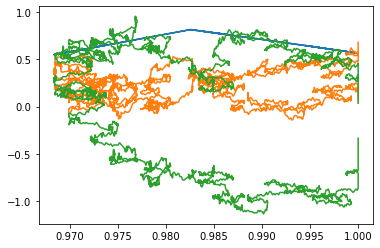

In [1633]:
plt.plot(obj4.alphas,(DEs4+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(obj4.alphas,occ20[-1]*1e5)

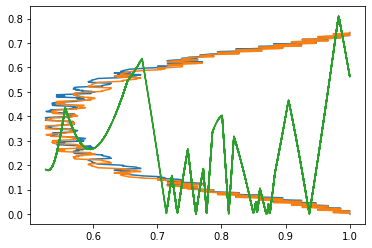

In [1654]:
tmp_pol2 = lin_interpolate(lin_interpolate(lin_interpolate(obj.activation_func(None).detach())))
plt.plot(tmp_pol2,occ9[-1]*200)
plt.plot(tmp_pol2,(DEs5+50*t.eye(19)).abs().min(1).values.min(1).values)

In [1700]:
obj3.alphas[:7993//2] - obj3.alphas[-7993//2+1:].flip(0)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.3365e-05, 1.5557e-05,
        7.8082e-06])

In [1839]:
perm= t.randperm(10)

In [1847]:
sorted = t.linspace(0,9,10)
inds = t.sort(sorted[perm]).indices
sorted[perm], sorted[perm]


(tensor([8., 3., 6., 1., 0., 9., 2., 4., 5., 7.]),
 tensor([8., 3., 6., 1., 0., 9., 2., 4., 5., 7.]))

In [1860]:
t.sort(-obj4.alphas)

torch.return_types.sort(
values=tensor([-1.0000, -1.0000, -1.0000,  ..., -0.5258, -0.5258, -0.5258]),
indices=tensor([   0,    1,    2,  ..., 2020, 1977, 1976]))

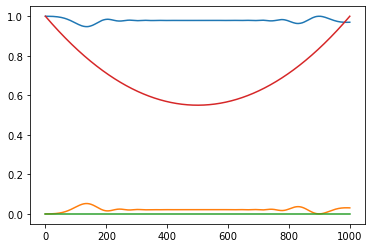

In [1994]:
3997//2

1998

In [2004]:
tmp = []
for j in range(501):
    i = 500 - j
    # tmp_U0 = -1j*(obj3.H0_term[i] - t.diag(obj3.H0_term[i].diagonal()))
    # tmp_U1 = -1j*(obj3.H0_term[-i-1] - t.diag(obj3.H0_term[-i-1].diagonal()))
    # tmp_U0 = -1j*(obj2.H0_term[i] - t.diag(obj2.H0_term[i].diagonal()))
    # tmp_U1 = -1j*(obj2.H0_term[-i-1] - t.diag(obj2.H0_term[-i-1].diagonal()))
    # tmp_U0 = -1j*(obj4.H0_term[i] - t.diag(obj4.H0_term[i].diagonal()))
    # tmp_U1 = -1j*(obj4.H0_term[-i-1] - t.diag(obj4.H0_term[-i-1].diagonal()))
    tmp_U0 = -1j*(obj5.H0_term[i] - t.diag(obj5.H0_term[i].diagonal()))
    tmp_U1 = -1j*(obj5.H0_term[-i-1] - t.diag(obj5.H0_term[-i-1].diagonal()))
    tmp.append((tmp_U0 - tmp_U1.adjoint()).abs().mean())
# plt.imshow((tmp_U0 - tmp_U1.adjoint()).abs())
# plt.colorbar()
# obj2.alphas[1123],obj2.alphas[-1123]

In [1986]:
obj5.alphas[-11]

tensor(0.9822)

In [2012]:
diff = obj4.alphas[1:] - obj4.alphas[:-1]
diff[diff != 0].abs().min()

tensor(2.0266e-06)

tensor(0.0001)

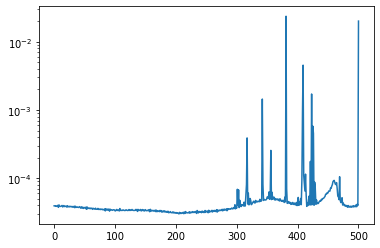

In [2005]:
plt.plot(tmp)
plt.yscale('log')
t.mean(t.tensor(tmp))

tensor(0.2094)

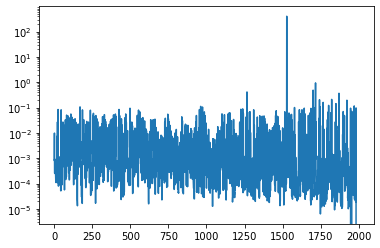

In [2003]:
plt.plot(tmp)
plt.yscale('log')
t.mean(t.tensor(tmp))

tensor(0.0051)

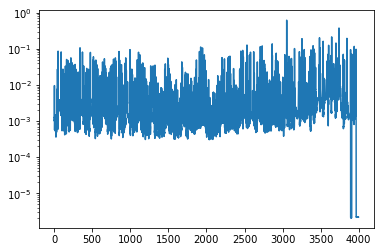

In [2001]:
plt.plot(tmp)
plt.yscale('log')
t.mean(t.tensor(tmp))

tensor(0.0079)

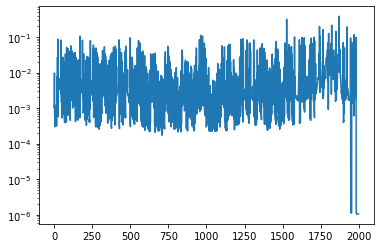

In [1999]:
plt.plot(tmp)
plt.yscale('log')
t.mean(t.tensor(tmp))

C:\Users\jv97\AppData\Local\Temp/ipykernel_13356/314002865.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


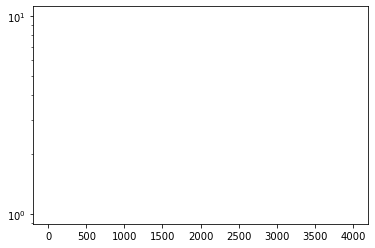

In [1949]:
plt.plot(tmp)
plt.yscale('log')

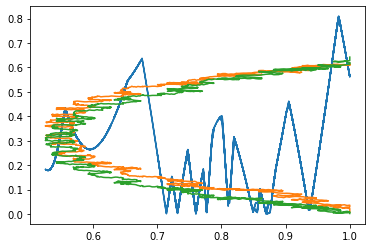

In [1625]:
plt.plot(lin_interpolate(obj.activation_func(None).detach()),(DEs3+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(lin_interpolate(alphas),occ7[-1]*1e4)
# plt.yscale('log')

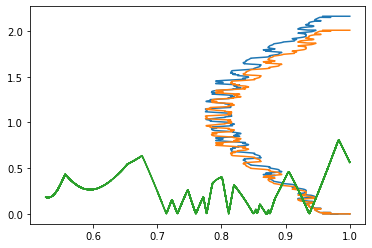

In [1664]:
plt.plot(pol2*(2-pol2),occ16[-1]*25)

plt.plot(pol2,(DEs2+50*t.eye(19)).abs().min(1).values.min(1).values)

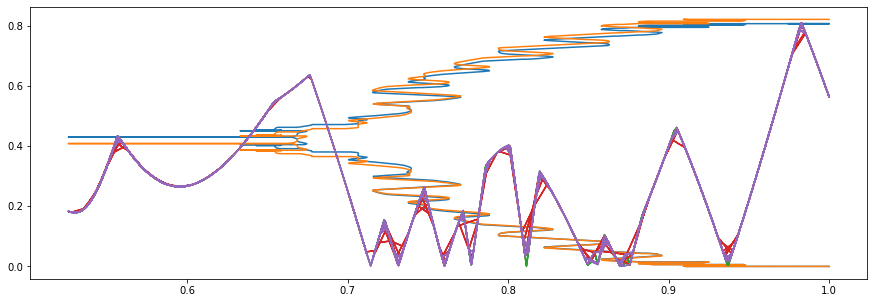

In [1621]:
plt.figure(figsize=(15,5))
plt.plot(pol2,occ17[-1]*25)
plt.plot(pol2,(DEs2+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(obj.activation_func(None).detach(),(DEs+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(lin_interpolate(obj.activation_func(None).detach()),(DEs3+50*t.eye(19)).abs().min(1).values.min(1).values)

# plt.vlines(pol2[(DEs2+50*t.eye(19)).abs().min(1).values.min(1).values<0.01],0,0.8)

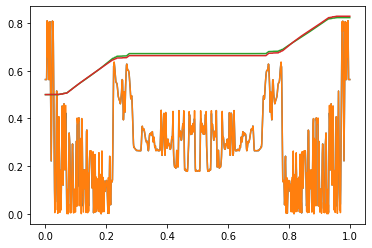

In [1604]:
plt.plot(t.linspace(0,1,1000),(DEs+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(t.linspace(0,1,3997),(DEs2+50*t.eye(19)).abs().min(1).values.min(1).values)
plt.plot(t.linspace(0,1,3997),occ17[-1]*10+0.5)
# mask = (DEs2+50*t.eye(19)).abs().min(1).values.min(1).values < 0.1
# plt.plot(t.linspace(0,1,3997),mask)
# plt.plot(obj2.alphas)

In [1656]:
((DEs2 + t.eye(19))).abs().min()/((DEs5 + t.eye(19))).abs().min()

tensor(1.)

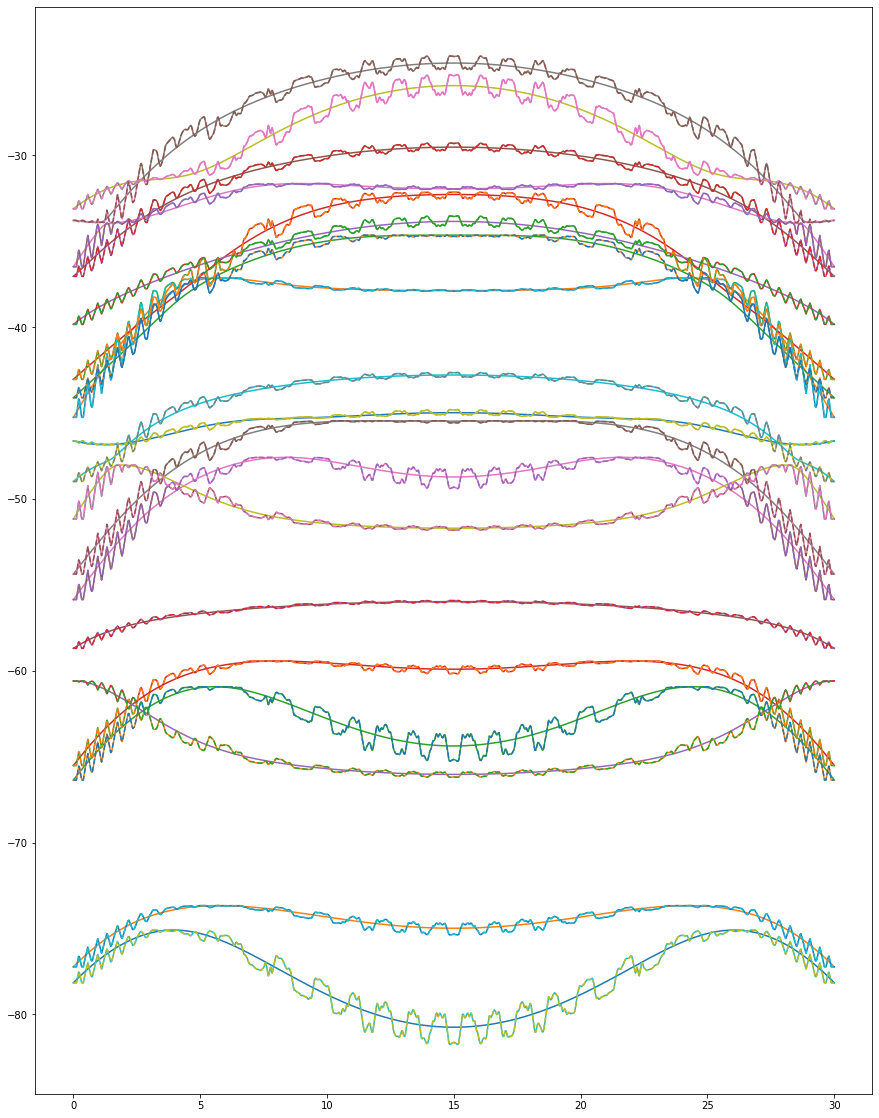

In [1984]:
plt.figure(figsize=(15,20))
plt.plot(t.linspace(0,30,1000),Es6)
plt.plot(t.linspace(0,30,1000),Es[:,:19])
plt.plot(t.linspace(0,30,3997),Es2,linestyle='--');

In [2052]:
filename = "UE0s_N"+str(1999)+"_q"+str(10)+"_sH"+str(19)+".pt"
_ = t.load(os.path.join(obj4.params_dict['exp_path'],filename))
Es5 = _[:-1,0]
U0s = _[:,1:]

In [2053]:
dt = 30/1998

In [2058]:
Fs = -1/(Es5.unsqueeze(2) - Es5.unsqueeze(1))
diag_inds = [_ for _ in range(19)]
Fs[:,diag_inds,diag_inds] = 0
alphas = t.concat([lin_interpolate(obj.activation_func(None).detach()),t.tensor([1.])])
U0dot = Fs*(U0s[:-1].adjoint()@(obj4.EJ*obj4.cos2_mat)@U0s[:-1])*(alphas[1:]-alphas[:-1]).view(-1,1,1)/dt
alphas = alphas[:-1]

In [2056]:
1999//2

999

In [2061]:
tmp = []
tmp_alpha = []
for j in range(1000):
    i = 999 - j
    tmp.append((U0dot[i] - U0dot[-i-1].adjoint()).abs().mean())
    tmp_alpha.append(alphas[i] - alphas[-i-1])

tensor(0.0131)

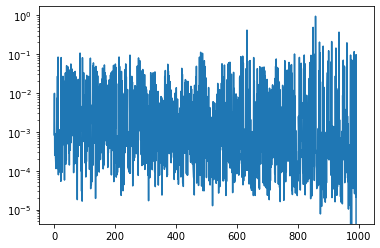

In [2071]:
plt.plot(tmp)
plt.yscale('log')
t.mean(t.tensor(tmp))
# plt.plot(t.abs(t.tensor(tmp_alpha)))

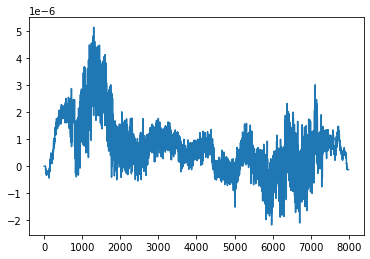

In [2051]:
i = 2
res = (U0s[:,:,[i]].adjoint()@U0s[0,:,[i]]).squeeze()
plt.plot(res.imag)

In [1981]:
Es6 = obj5.H0_term[:,[_ for _ in range(19)],[_ for _ in range(19)]].real
# Es = t.linalg.eigvalsh(obj4.KinE + obj4.V(obj.activation_func(None).detach(),t.tensor([0])))
# Es3 = t.linalg.eigvalsh(obj4.KinE + obj4.V(lin_interpolate(obj.activation_func(None).detach()),t.tensor([0])))
DEs6 = Es6[:,:19].unsqueeze(2) - Es6[:,:19].unsqueeze(1)
((DEs6 + t.eye(19))).abs().min()

tensor(0.0005)

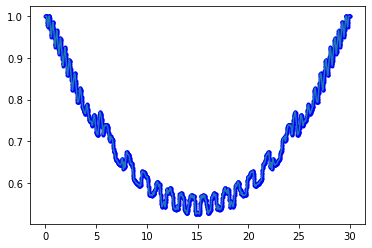

In [1020]:
# plt.plot(obj4.times[:-1],obj4.alphas[1:] - obj4.alphas[:-1])
# tmp = lin_interpolate(obj4.alphas)
# plt.plot(t.linspace(0,30,3996),tmp[1:]-tmp[:-1])
# plt.figure(figsize=(20,20))
plt.plot(obj4.times,obj4.alphas,'b.')
plt.plot(t.linspace(0,30,3997),tmp)

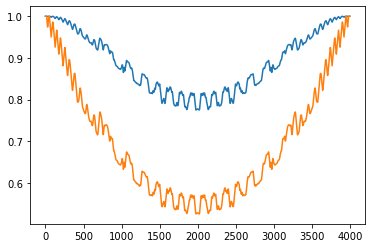

In [1246]:
plt.plot(pol2*(2-pol2))
plt.plot(pol2)

In [781]:
tmp = t.zeros(3997)
tmp2 = t.arange(0,3997+100,100)
# tmp2tmp[tmp2[-2]:tmp2[-1]].shape[0]
tmp2[-1] = tmp.shape[0]
tmp[tmp2[-2]:tmp2[-1]] = t.ones(97)
tmp

tensor([0., 0., 0.,  ..., 1., 1., 1.])

In [593]:
obj.minimize(0.000001,200)
# x = t.linspace(0,30,1000)
# plt.plot((x)*(x-30)/10000+1)
# plt.ylim(0,1)
# (x)*(x-30)/10000+1

initial loss: 1.949243596754968e-05
Ended at step: 1986, with loss: 8.728784450795501e-08 and runtime: 135.05733156204224


In [579]:
obj.stored_losses[0]

tensor([ 9.6806e-01,  9.6806e-01,  9.6663e-01,  ..., -2.6941e-05,
        -2.4557e-05, -2.5749e-05])

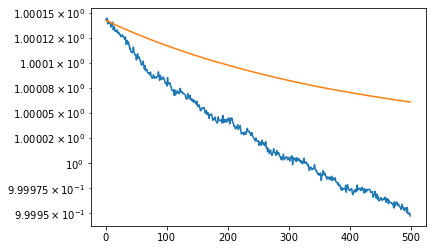

In [594]:
plt.plot(obj.stored_losses[:,-500:].T+1);
plt.yscale('log')

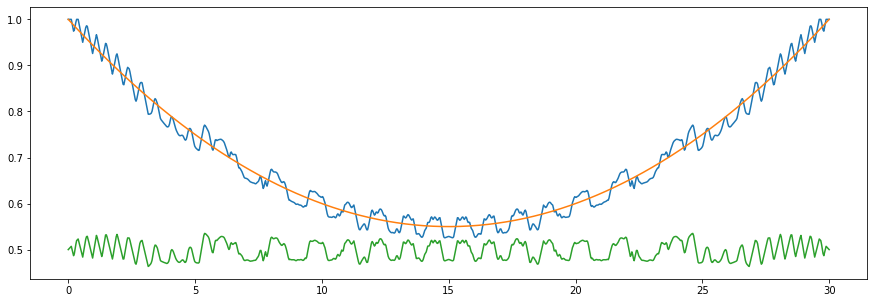

In [595]:
# obj.plot_activation_func()
plt.figure(figsize=(15,5))
new = obj.activation_func(obj.times).detach()
old = obj.init_activation_func(obj.times)
plt.plot(obj.times,new)
plt.plot(obj.times,old)
plt.plot(obj.times,new-old+0.5)

C:\Users\jv97\AppData\Local\Temp/ipykernel_13356/79764487.py:4: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  plt.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1)[:mask.sum()//2+1],t.fft.rfft((new-old)[mask]).abs())


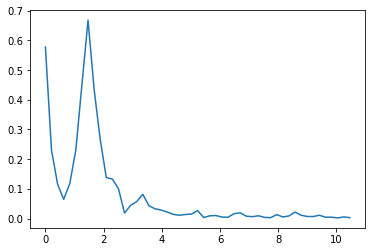

In [510]:
mask = (obj.times < 3)
# mask = (obj.times < 20)&(obj.times>10)

plt.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1)[:mask.sum()//2+1],t.fft.rfft((new-old)[mask]).abs())
# plt.xlim(0,150)

In [627]:
t.abs(new[:500] - new[500:].flip(0)).max().item()

0.00043702125549316406

In [1124]:
occ13[-1],occ14[-1]

(tensor([[7.1526e-07, 3.5763e-07],
         [9.5367e-07, 5.9605e-07],
         [1.0729e-06, 7.1526e-07],
         ...,
         [3.3589e-02, 3.3780e-02],
         [3.3589e-02, 3.3780e-02],
         [3.3589e-02, 3.3780e-02]]),
 tensor([[7.1526e-07, 3.5763e-07],
         [9.5367e-07, 5.9605e-07],
         [1.0729e-06, 7.1526e-07],
         ...,
         [3.3564e-02, 3.3785e-02],
         [3.3565e-02, 3.3785e-02],
         [3.3565e-02, 3.3785e-02]]))

In [1967]:
# occ = obj2.get_occupancy([_ for _ in range(19)],[0,1]).detach()
# occ2 = obj2.get_occupancy([_ for _ in range(19)],[0,1]).detach()
occ22 = obj5.get_occupancy([_ for _ in range(19)],[0,1]).detach()

In [1968]:
occ22[-1]

tensor([[-1.1921e-07,  8.9407e-07],
        [-1.7881e-06,  1.1921e-06],
        [-3.8147e-06,  1.1921e-07],
        ...,
        [-3.0696e-04, -2.9540e-04],
        [-3.0935e-04, -2.9564e-04],
        [-3.0982e-04, -2.9480e-04]])

In [699]:
# occ[-1,:,0].max().item(),occ[-1,:,1].max().item()
t.abs(new[:500] - new[500:].flip(0)).max().item()

0.00043702125549316406

In [689]:
occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,2,4,5] else None for i in range(19)]
occ_labels[0] + "\n"+r"$|\psi_0|^2 = $"+str(occ[0,-1,0].item())[:7]

'$\\psi_0$\n$|\\psi_0|^2 = $0.00044'

In [903]:
occ6.shape, obj3.times.shape, obj2.times.shape

(torch.Size([20, 3999, 2]), torch.Size([3999]), torch.Size([3997]))

Text(0.5, 1.0, '$|\\langle \\psi_n(t) |\\mathcal{U}(t)| \\psi_1(0)\\rangle|^2$')

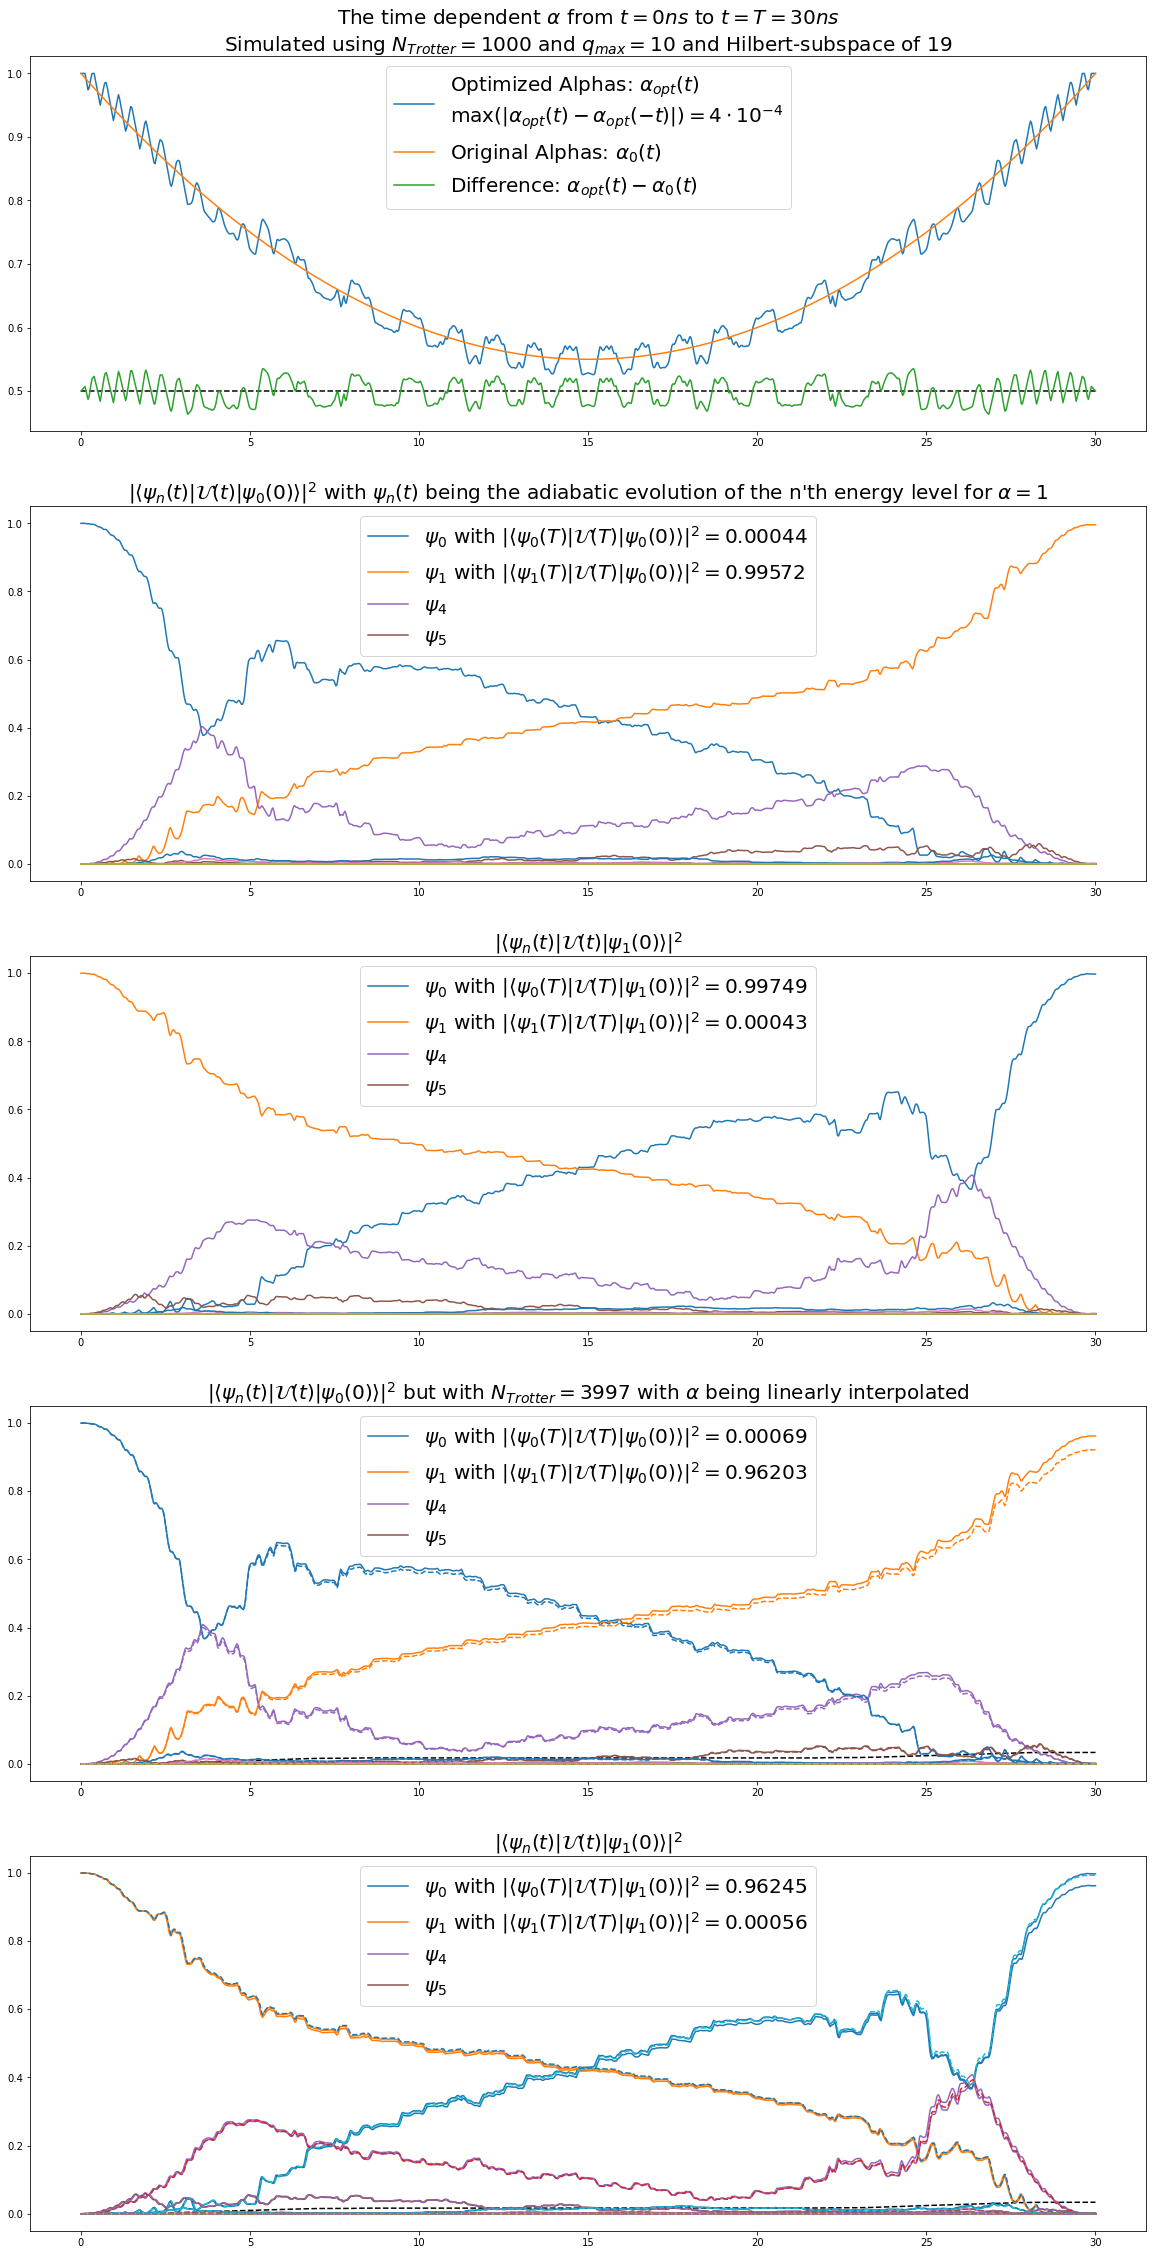

In [1109]:
fontsize=20

fig, ax = plt.subplots(figsize=(20,40),nrows=5)

new = obj.activation_func(obj.times).detach()
old = obj.init_activation_func(obj.times)
ax[0].plot(obj.times,new,label=r'Optimized Alphas: $\alpha_{opt}(t)$'+'\n'+r'max$(|\alpha_{opt}(t) - \alpha_{opt}(-t)|) = 4\cdot 10^{-4}$')
# ax[0].plot(obj2.times,obj2.alphas,linestyle='--')
ax[0].plot(obj.times,old,label=r'Original Alphas: $\alpha_0(t)$')
ax[0].plot(obj.times,new-old+0.5,label=r'Difference: $\alpha_{opt}(t) - \alpha_0(t)$')
ax[0].hlines(0.5,0,30,linestyle='--',color='k',zorder=-1)
ax[0].legend(fontsize=fontsize)
ax[0].set_title(r"The time dependent $\alpha$ from $t=0ns$ to $t=T=30ns$" +"\n" + r"Simulated using $N_{Trotter} = 1000$ and $q_{max}=10$ and Hilbert-subspace of 19",fontsize=fontsize)

# ax[1].plot(obj.times[:500],new[:500])
# ax[1].plot(obj.times[:500],new[500:].flip(0))
# ax[1].plot(obj.times[:500],t.abs(new[:500] - new[500:].flip(0)))
# ax[1].set_yscale('log')

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ[0,-1,0].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ[1,-1,0].item())[:7]

ax[1].plot(obj.times,occ[:-1,:,0].T,label=occ_labels)
ax[1].plot(obj.times,occ[-1,:,0],'k--',zorder=-1)
ax[1].legend(fontsize=fontsize)
ax[1].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_0(0)\rangle|^2$ with $\psi_n(t)$ being the adiabatic evolution of the n'th energy level for $\alpha=1$",fontsize=fontsize)
# ax[1].hlines(1,0,30,zorder=-1,linestyle='--',color='k')
# ax[1].set_ylim(1e-4,1.1)
# ax[1].set_yscale('log')

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ[0,-1,1].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ[1,-1,1].item())[:7]

ax[2].plot(obj.times,occ[:-1,:,1].T,label=occ_labels)
ax[2].plot(obj.times,occ[-1,:,1],'k--',zorder=-1)
ax[2].legend(fontsize=fontsize)
ax[2].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_1(0)\rangle|^2$",fontsize=fontsize)

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ2[0,-1,0].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ2[1,-1,0].item())[:7]

ax[3].plot(obj2.times,occ2[:-1,:,0].T,label=occ_labels)
ax[3].set_prop_cycle(None)
# ax[3].plot(obj.times,occ[:-1,:,0].T,linestyle='--')
ax[3].plot(obj4.times,occ11[:-1,:,0].T,linestyle='--')
ax[3].plot(obj2.times,occ2[-1,:,0],'k--',zorder=-1)
ax[3].legend(fontsize=fontsize)
ax[3].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_0(0)\rangle|^2$ but with $N_{Trotter}=3997$ with $\alpha$ being linearly interpolated",fontsize=fontsize)

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ2[0,-1,1].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ2[1,-1,1].item())[:7]

ax[4].plot(obj2.times,occ2[:-1,:,1].T,label=occ_labels)
ax[4].set_prop_cycle(None)
ax[4].plot(obj.times,occ[:-1,:,1].T,linestyle='-')
# ax[4].plot(obj3.times,occ6[:-1,:,1].T,linestyle='--')
ax[4].plot(obj3.times,occ9[:-1,:,1].T,linestyle='--')
ax[4].plot(obj2.times,occ2[-1,:,1],'k--',zorder=-1)
ax[4].legend(fontsize=fontsize)
ax[4].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_1(0)\rangle|^2$",fontsize=fontsize)

In [2073]:
obj2.alphas

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [1065]:
U0s, E0s = obj2.load_UE0s()

In [1070]:
tmp = U0s[1:].adjoint()@U0s[:-1]
U0dot = 1/(2*obj2.dt)*(tmp - tmp.adjoint())

In [1078]:
# U0dot[:,[_ for _ in range(19)],[_ for _ in range(19)]]
((U0dot + U0dot.adjoint()).abs() == 0).all()

tensor(True)

In [1073]:
(obj2.H0_term[:,[_ for _ in range(19)],[_ for _ in range(19)]].imag == 0).all()

tensor(True)

In [974]:
(obj2.H0_term[:,[_ for _ in range(19)],[_ for _ in range(19)]].imag == 0).all()

tensor(True)

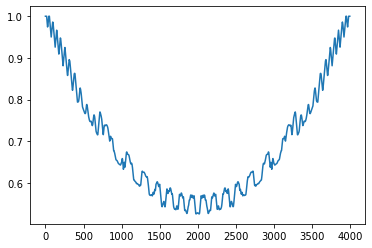

In [1005]:
plt.plot(lin_interpolate(obj4.alphas))

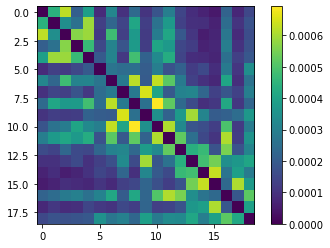

In [1068]:
plt.imshow(tmp.abs().sum(0)-t.diag(t.ones(19)*3998))
plt.colorbar()

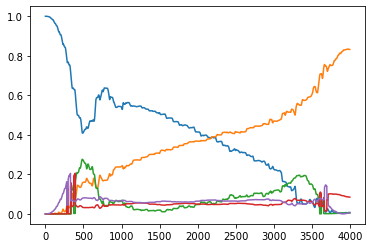

In [910]:
# (tmp[:1998] - tmp[-1998:].flip(0)).abs().max()
# occ5[-1], occ6[-1]
plt.plot(occ6[:5,:,0].T);

In [944]:
obj2.times[occ4[1,:,0]<occ4[4,:,0]][-1], obj2.times[occ4[0,:,0]<occ4[4,:,0]]

(tensor(5.2477),
 tensor([ 3.5586,  3.5661,  3.5736,  3.5811,  3.5886,  3.5961,  3.6036,  3.6111,
          3.6186,  3.6261,  3.6336,  3.6411,  3.6486,  3.6562,  3.6637,  3.6712,
          3.6787,  3.6862,  3.6937,  3.7012,  3.7087,  3.7162,  3.7237,  3.7312,
          3.7387,  3.7462,  3.7538,  3.7613,  3.7688,  3.7763,  3.7838,  3.7913,
          3.7988,  3.8063,  3.8138,  3.8213, 22.8228, 22.8303, 22.8378, 22.8453,
         22.8529, 22.8604, 22.8679, 22.8754, 22.8829, 22.8904, 22.8979, 22.9054,
         22.9129, 22.9204, 22.9279, 22.9354, 22.9429, 22.9505, 22.9580, 22.9655,
         22.9730, 22.9805, 22.9880, 22.9955, 23.0030, 23.0105, 23.0180, 23.0255,
         23.0330, 23.0405, 23.0480, 23.0556, 23.0631, 23.2733, 23.2808, 23.2883,
         23.2958, 23.3033, 23.3108, 23.3183, 23.3258, 23.3333, 23.3408, 23.3483,
         23.3559, 23.3634, 23.3709, 23.3784, 23.3859, 23.3934, 23.4009, 23.4084,
         23.4159, 23.4234, 23.4309, 23.4384, 23.4459, 23.4535, 23.4610, 23.4685,
         23

In [935]:
obj2.times[occ4[-1,:,0] >0.02][0], obj2.times[occ4[-1,:,0] <0.03][-1]

(tensor(23.6562), tensor(27.0495))

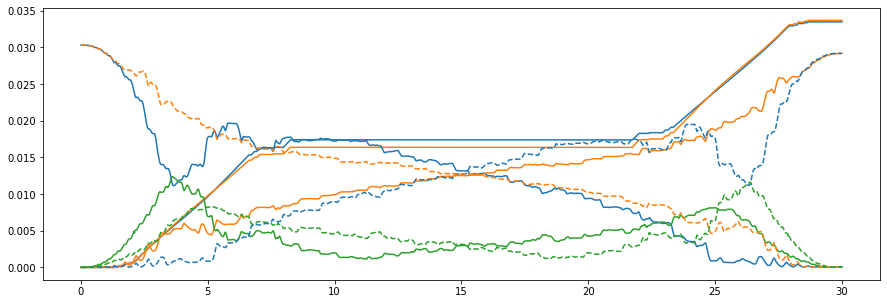

In [979]:
plt.figure(figsize=(15,5))
plt.plot(obj2.times,occ4[-1])
plt.gca().set_prop_cycle(None)
plt.plot(obj2.times,occ4[[0,1,4],:,0].T/33)
plt.gca().set_prop_cycle(None)
plt.plot(obj2.times,occ4[[0,1,4],:,1].T/33,linestyle='--')
# plt.yscale('log')

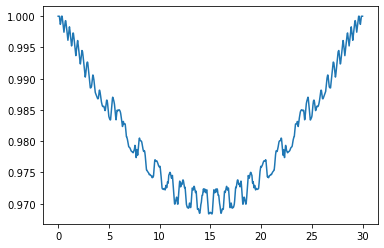

In [1482]:
plt.plot(obj4.times,pol2**(0.05))

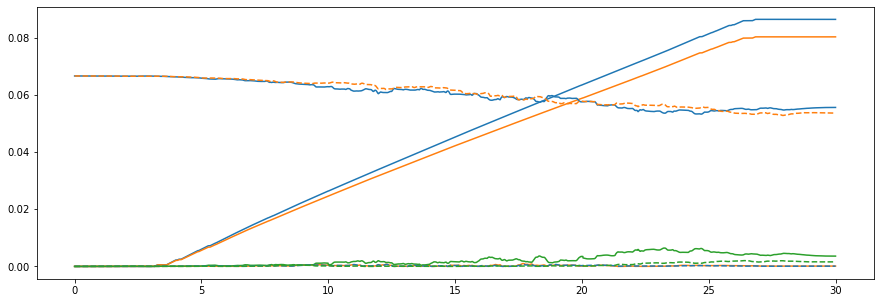

In [1473]:
plt.figure(figsize=(15,5))
plt.plot(obj2.times,occ16[-1])
plt.gca().set_prop_cycle(None)
plt.plot(obj2.times,occ16[[0,1,4],:,0].T/15)
plt.gca().set_prop_cycle(None)
plt.plot(obj2.times,occ16[[0,1,4],:,1].T/15,linestyle='--')
# plt.yscale('log')

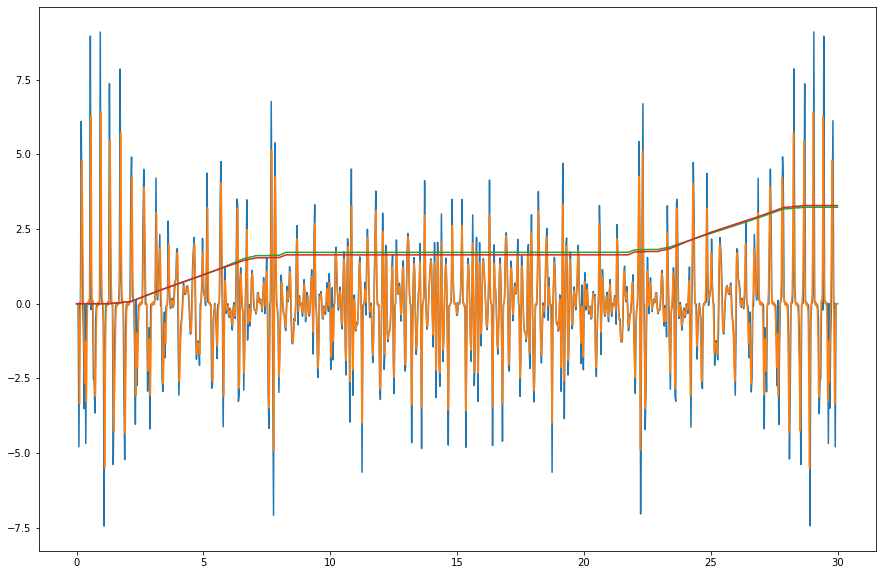

In [1453]:
# plt.figure(figsize=(15,5))
# plt.plot(obj4.times,occ16[:-3,:,0].T);
# plt.plot(obj4.times,occ16[-1,:,:],'k--')
# plt.plot(obj4.times,obj4.alphas)

plt.figure(figsize=(15,10))

def diff(sig):
    N = sig.shape[0]
    dt = 30/(N - 1)
    d = (sig[1:] - sig[:-1])/dt
    return t.linspace(0,30,N-1), d

def ddiff(sig):
    N = sig.shape[0]
    dt = 30/(N-1)
    d = (sig[2:] - 2*sig[1:-1] + sig[:-2])/(2*dt**2)
    return t.linspace(0,30,N-2), d


alphas = obj.activation_func(None).detach()
# plt.plot(*diff(pol2))
# plt.plot(*diff(obj.activation_func(None).detach()),linestyle='--')
# plt.plot(*diff(diff(lin_interpolate(lin_interpolate(alphas)))[1]))
# plt.plot(*diff(diff(gauss_interpolate(obj.times,alphas,4000,0.03)[1])[1]))
# plt.plot(*diff(diff(pol1)[1]))
# plt.plot(*diff(diff(alphas)[1]),linestyle='--')

plt.plot(*ddiff(alphas))
plt.plot(*ddiff(pol1))
# plt.plot(*ddiff(pol2))
# plt.plot(*diff(diff(alphas)[1]),linestyle='--')
plt.plot(obj2.times,occ17[-1]*100)

In [1427]:
for sig in t.linspace(0.031,0.029,20):
    tmp1, ddiff_gauss = diff(diff(gauss_interpolate(obj.times,alphas,3991,0.03)[1])[1])
    tmp2, ddiff_alphs = diff(diff(alphas)[1])
    ddiff_alphs = lin_interpolate(lin_interpolate(ddiff_alphs))
    print(sig,(ddiff_gauss-ddiff_alphs).abs().mean())

tensor(0.0310) tensor(0.9304)
tensor(0.0309) tensor(0.9304)
tensor(0.0308) tensor(0.9304)
tensor(0.0307) tensor(0.9304)
tensor(0.0306) tensor(0.9304)
tensor(0.0305) tensor(0.9304)
tensor(0.0304) tensor(0.9304)
tensor(0.0303) tensor(0.9304)
tensor(0.0302) tensor(0.9304)
tensor(0.0301) tensor(0.9304)
tensor(0.0299) tensor(0.9304)
tensor(0.0298) tensor(0.9304)
tensor(0.0297) tensor(0.9304)
tensor(0.0296) tensor(0.9304)
tensor(0.0295) tensor(0.9304)
tensor(0.0294) tensor(0.9304)
tensor(0.0293) tensor(0.9304)
tensor(0.0292) tensor(0.9304)
tensor(0.0291) tensor(0.9304)
tensor(0.0290) tensor(0.9304)


In [1439]:
obj4.times.shape, occ18.shape

(torch.Size([4000]), torch.Size([31, 4000, 2]))

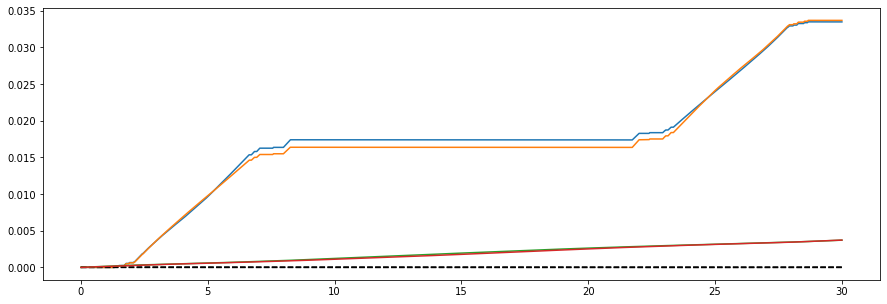

In [1486]:
plt.figure(figsize=(15,5))
# plt.plot(occ3[-1])
# plt.plot(occ2[-1])
# plt.plot(occ[-1])
plt.plot(obj2.times,occ4[-1])
# plt.plot(occ5[-1])
# plt.plot(occ6[-1])
tmp = obj3.alphas
diff = tmp[1:] - tmp[:-1]
ddiff = tmp[2:] - 2*tmp[1:-1] + tmp[:-2]
plt.plot(obj4.times,occ20[-1],'k',linestyle='--')
plt.plot(obj3.times,occ9[-1])
plt.hlines(0,0,30,'gray',linestyle='--')
# plt.plot(ddiff)
# plt.plot(tmp/10)
# plt.yscale('log')
# plt.xlim(0,500)
# obj2.times[(t.log10(occ4[-1,:,0]) >-4)][0], obj2.times[(t.log10(occ4[-1,:,0]) <-2)][-1]

# plt.plot(obj4.times,obj4.alphas/20)
# plt.plot(obj4.times,pol2/20)


In [1484]:
obj4.init_wavefuncs[:,[0]]

tensor([[ 1.0000e+00+0.0000e+00j],
        [ 7.8100e-08-9.2825e-09j],
        [ 3.7069e-07+1.4458e-10j],
        [ 3.1889e-07-1.1339e-08j],
        [-1.3900e-07-3.4880e-08j],
        [ 1.6127e-08+1.3656e-08j],
        [-9.5206e-10-9.0122e-09j],
        [ 3.6457e-08-3.9482e-08j],
        [-3.0687e-10+2.1428e-08j],
        [-7.0322e-08+3.6139e-08j],
        [-3.4815e-08-9.9761e-09j],
        [ 1.5135e-08+1.3039e-08j],
        [ 6.1772e-09-3.4547e-08j],
        [-5.2635e-08+1.8923e-08j],
        [ 2.6161e-08+1.5648e-09j],
        [ 1.3395e-08+1.1887e-08j],
        [-1.6428e-08-4.0428e-09j],
        [-7.3444e-08+1.2399e-08j],
        [-4.4191e-08-1.5095e-08j]])

In [1441]:
for i in range(20):
    try:
        eval(f"print(i, occ{i}.shape, occ{i}[-1,-1])")
    except:
        print(i)

0
1
2 torch.Size([20, 3997, 2]) tensor([0.0335, 0.0337])
3 torch.Size([20, 3997, 2]) tensor([0.0333, 0.0336])
4 torch.Size([20, 3997, 2]) tensor([0.0335, 0.0337])
5 torch.Size([20, 4000, 2]) tensor([0.0346, 0.0352])
6 torch.Size([20, 3999, 2]) tensor([0.0315, 0.0330])
7 torch.Size([20, 1999, 2]) tensor([6.1333e-05, 6.4254e-05])
8 torch.Size([20, 3997, 2]) tensor([0.0335, 0.0337])
9 torch.Size([20, 7993, 2]) tensor([0.0037, 0.0037])
10 torch.Size([20, 3997, 2]) tensor([0.0329, 0.0331])
11 torch.Size([20, 3997, 2]) tensor([0.0745, 0.0743])
12 torch.Size([20, 3997, 2]) tensor([0.0336, 0.0338])
13 torch.Size([20, 3997, 2]) tensor([0.0336, 0.0338])
14 torch.Size([20, 3997, 2]) tensor([0.0336, 0.0338])
15 torch.Size([20, 3997, 2]) tensor([0.0317, 0.0321])
16 torch.Size([20, 3997, 2]) tensor([0.0865, 0.0804])
17 torch.Size([31, 3997, 2]) tensor([0.0323, 0.0328])
18 torch.Size([31, 4000, 2]) tensor([0.0345, 0.0348])
19


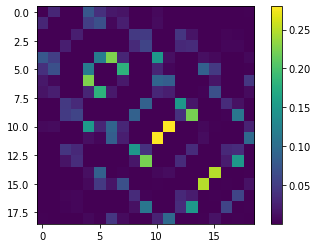

In [1234]:
obj2.alphas[53:55]
# U0s[53:55]
U0dot = 1/(2*obj2.dt)*(U0s[54].adjoint()@U0s[53] - U0s[53].adjoint()@U0s[54])
U0dot2 = 1/(4*obj2.dt)*(U0s[54].adjoint()@U0s[52] - U0s[52].adjoint()@U0s[54])
plt.imshow((U0dot - U0dot2).abs())
plt.colorbar()

In [1171]:
# par = t.tensor([obj2.alphas[53].item()],requires_grad=True)
# H = obj2.KinE + obj2.V(par,t.tensor([0]))
# eigval, eigvec = t.linalg.eigh(H.squeeze())
# eigvec = eigvec[:,:19]
# angles = (U0s[53].adjoint()@eigvec).diagonal().angle()
# eigvec = eigvec*t.exp(-1j*angles.view(1,-1))

# tmp = t.zeros_like(eigvec)
# for i in tqdm(range(tmp.shape[0])):
#     for j in range(tmp.shape[1]):
#         eigvec[i,j].backward(retain_graph=True)
#         tmp[i,j] = par.grad
#         par.grad.zero_()

# eigvec.backward()
# U0dot3 = par.grad.adjoint()@eigvec*(obj2.alphas[54] - obj2.alphas[53])/obj2.dt

100%|██████████| 441/441 [03:38<00:00,  2.02it/s]


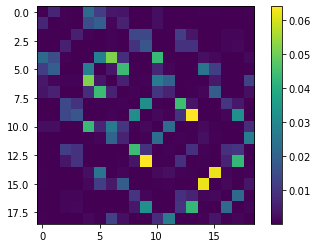

In [1208]:
plt.imshow((U0dot - U0dot3).abs())
plt.colorbar()

In [1197]:
(obj2.alphas[54] - obj2.alphas[53])/obj2.dt

tensor(-0.2809)

In [1206]:
# U0dot3 = par.grad.adjoint()@eigvec*(obj2.alphas[54] - obj2.alphas[53])/obj2.dt
F = -1/(E0s[53].unsqueeze(1) - E0s[53].unsqueeze(0))
F[[_ for _ in range(19)],[_ for _ in range(19)]] = 0
U0dot3 = F*(U0s[53].adjoint()@(obj2.EJ*obj2.cos2_mat)@U0s[53])*(obj2.alphas[54] - obj2.alphas[52])/(2*obj2.dt)

In [1085]:
from tqdm import tqdm
alphas = obj2.alphas
control = t.zeros(obj2.NTrot)
bitesize = 100
bites = t.arange(0,obj2.NTrot+bitesize,bitesize)
evo = t.eye(obj2.NHilbert**2).cfloat()
for i in tqdm(range(bites.shape[0]-1)):
    H = obj2.KinE + obj2.V(alphas=alphas[bites[i]:bites[i+1]],control=control[bites[i]:bites[i+1]])
    exp_mat = t.matrix_exp(-1j*H*obj2.dt)
    evo = t.linalg.multi_dot(list(mat for mat in exp_mat.flip(0)))@evo

100%|██████████| 40/40 [08:05<00:00, 12.13s/it]


In [1271]:
obj.NTrot

1000

In [1282]:
from tqdm import tqdm
alphas = obj.activation_func(None).detach()
control = t.zeros(obj.NTrot)
bitesize = 100
bites = t.arange(0,obj.NTrot+bitesize,bitesize)
evo2 = t.eye(obj2.NHilbert**2).cfloat()
for i in tqdm(range(bites.shape[0]-1)):
    H = obj2.KinE + obj2.V(alphas=alphas[bites[i]:bites[i+1]],control=control[bites[i]:bites[i+1]])
    exp_mat = t.matrix_exp(-1j*H*obj.dt)
    evo2 = t.linalg.multi_dot(list(mat for mat in exp_mat.flip(0)))@evo2

100%|██████████| 10/10 [03:37<00:00, 21.74s/it]


In [1295]:
tmp2 = obj2.eigvecs.adjoint()@evo2@obj2.eigvecs[:,:2]
tmp2.abs().square()[:2]

tensor([[2.9386e-04, 9.9489e-01],
        [9.9483e-01, 2.7060e-04]])

tensor(0.0003)

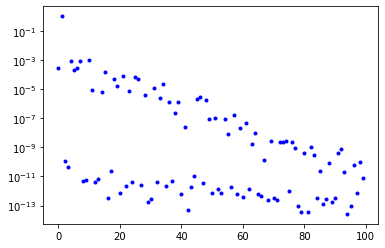

In [1296]:
plt.plot(tmp2.abs().square()[:100,0],'b.')
plt.yscale('log')
tmp2.abs().square()[19:,0].sum()

In [1297]:
tmp = obj2.eigvecs.adjoint()@evo@obj2.eigvecs[:,:2]
tmp.abs().square()[:2]

tensor([[4.6473e-04, 9.9488e-01],
        [9.9482e-01, 4.3067e-04]])

tensor(0.0003)

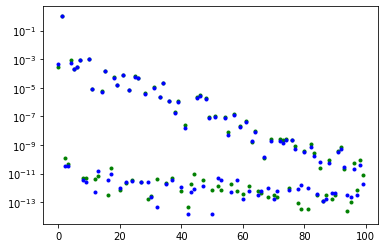

In [1299]:
plt.plot(tmp.abs().square()[:100,0],'b.')
plt.plot(tmp2.abs().square()[:100,0],'g.',zorder=-1)
plt.yscale('log')
tmp.abs().square()[19:,0].sum()

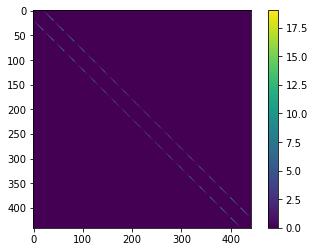

In [1335]:
def comm(A,B):
    return A@B - B@A
# plt.imshow(comm(obj2.cos2_mat,obj2.cos_mat).abs())
# plt.imshow(comm(obj2.cos_mat,comm(obj2.cos2_mat,obj2.cos_mat)).abs())
plt.imshow(comm(obj2.KinE/(4*obj2.params_dict['EC']),obj2.cos2_mat).abs())
# plt.imshow(comm(obj2.q_mat,obj2.cos_mat).abs())
# plt.imshow(obj2.q_mat.abs())
plt.colorbar()

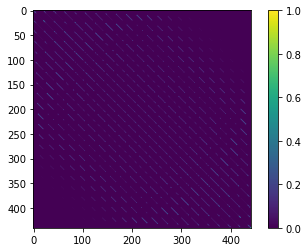

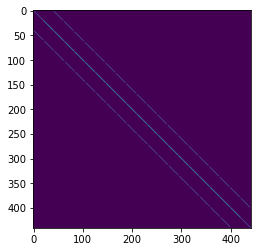

In [1357]:
plt.imshow(t.matrix_exp(obj2.cos2_mat*(-4*t.pi*1j)).abs())
plt.colorbar()
plt.figure()
plt.imshow((t.matrix_power(-1j*obj2.cos2_mat,2)).abs())

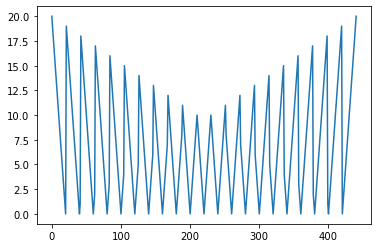

In [1324]:
(comm(obj2.q_mat,obj2.cos2_mat).abs() == 0).all()
plt.plot(obj2.q_mat.diagonal().abs())

In [838]:
occ2[-1], occ[-1], occ3[-1], (occ2 - occ3).abs().max()

(tensor([[7.1526e-07, 3.5763e-07],
         [9.5367e-07, 5.9605e-07],
         [1.0729e-06, 7.1526e-07],
         ...,
         [3.3543e-02, 3.3740e-02],
         [3.3543e-02, 3.3740e-02],
         [3.3544e-02, 3.3741e-02]]),
 tensor([[ 0.0000e+00,  1.1921e-06],
         [-7.1526e-07,  2.1458e-06],
         [-1.1921e-06,  3.2187e-06],
         ...,
         [-3.5918e-04, -3.6633e-04],
         [-3.5822e-04, -3.6681e-04],
         [-3.5727e-04, -3.6740e-04]]),
 tensor([[7.1526e-07, 3.5763e-07],
         [9.5367e-07, 5.9605e-07],
         [1.0729e-06, 7.1526e-07],
         ...,
         [3.3266e-02, 3.3578e-02],
         [3.3267e-02, 3.3578e-02],
         [3.3267e-02, 3.3578e-02]]),
 tensor(0.0009))

In [809]:
# fig.savefig(os.path.join(obj.params_dict['exp_path'],"SymAlpha_XGate.pdf"))

In [731]:
# tmp1, tmp2 = interpolate(obj.times,new,2000)
# tmp2
t.arange(0,11,1)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [736]:
(1000*2 - 1)*2 -1

3997

(14.0, 16.0)

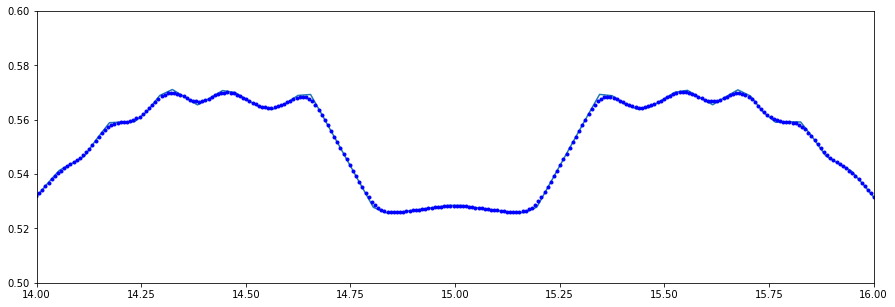

In [1431]:
def gauss_interpolate(old_x,vals,N,res=0.01):
    assert old_x.shape[0] < N
    new_x = t.linspace(old_x.min(),old_x.max(),N)
    sqrd_dists = ((new_x.view(-1,1) - old_x.view(1,-1))/res)**2
    gauss = t.exp(-sqrd_dists)
    gauss = gauss/gauss.sum(1,keepdim=True)
    return new_x, gauss@vals

def lin_interpolate(vals):
    out = t.zeros(vals.shape[0]*2-1)
    out[::2] = vals
    out[1::2] = 0.5*(vals[1:] + vals[:-1])
    return out

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(obj.times,new)
# ax.plot(t.linspace(0,30,2000-1),lin_interpolate(new))
nt, pol1 = gauss_interpolate(obj.times,new,4000,0.03)
pol2 = lin_interpolate(lin_interpolate(new))
ax.plot(nt,pol1,'b.')
# ax.plot(nt,pol2)
ax.set_ylim(0.5,0.6)
ax.set_xlim(14,16)
# new_times, interpolated = interpolate(obj.times,new,5000,0.01)
# # ax.plot(new_times, interpolated)
# ax.plot(obj.times, (interpolated[::5] - new).abs())
# ax.plot(obj.times, (interpolated[::5] - new).abs())
# ax.plot(pol1-pol2)
# ax.set_yscale('log')

In [650]:
# print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [535]:
U0s, E0s = obj2.load_UE0s()
q_exp = t.zeros(obj2.NTrot,2)
wavefuncs = obj2.init_wavefuncs[:,[0,1]]
for i, mat in enumerate(obj2.latest_matrix_exp):
    wavefuncs = mat@wavefuncs
    q_exp[i] = (wavefuncs.adjoint()@U0s[i].adjoint()@obj2.q_mat@U0s[i]@wavefuncs).diagonal()

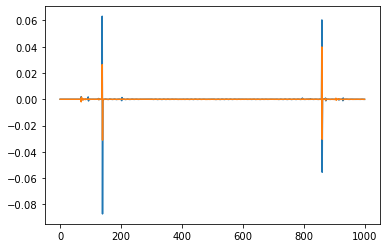

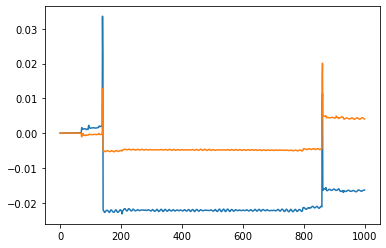

In [542]:
plt.plot(q_exp.detach())
phi_exp = t.zeros(obj2.NTrot,2)
phi_exp[:,0] = t.tensor([t.trapezoid(q_exp[:i,0]).item() for i in range(q_exp.shape[0])])
phi_exp[:,1] = t.tensor([t.trapezoid(q_exp[:i,1]).item() for i in range(q_exp.shape[0])])
plt.figure()
plt.plot(phi_exp)

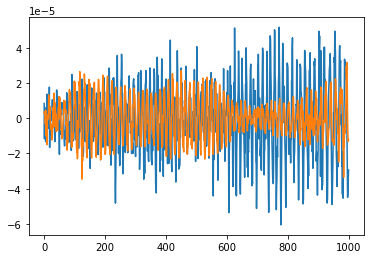

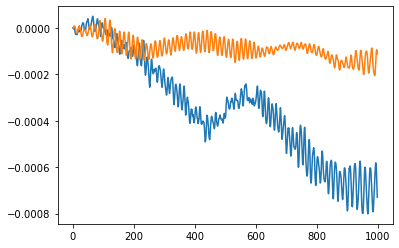

In [533]:
plt.plot(q_exp.detach())
phi_exp = t.zeros(obj2.NTrot,2)
phi_exp[:,0] = t.tensor([t.trapezoid(q_exp[:i,0]).item() for i in range(q_exp.shape[0])])
phi_exp[:,1] = t.tensor([t.trapezoid(q_exp[:i,1]).item() for i in range(q_exp.shape[0])])
plt.figure()
plt.plot(phi_exp)

In [421]:
obj.stored_losses[0,-100:]

tensor([0.0838, 0.0830, 0.0823, 0.0816, 0.0810, 0.0803, 0.0796, 0.0789, 0.0783,
        0.0776, 0.0770, 0.0763, 0.0757, 0.0751, 0.0744, 0.0738, 0.0732, 0.0726,
        0.0720, 0.0714, 0.0708, 0.0702, 0.0696, 0.0690, 0.0684, 0.0679, 0.0673,
        0.0667, 0.0661, 0.0656, 0.0650, 0.0645, 0.0639, 0.0634, 0.0629, 0.0623,
        0.0618, 0.0613, 0.0608, 0.0603, 0.0597, 0.0592, 0.0588, 0.0583, 0.0578,
        0.0573, 0.0568, 0.0563, 0.0559, 0.0554, 0.0550, 0.0545, 0.0541, 0.0536,
        0.0532, 0.0528, 0.0523, 0.0519, 0.0515, 0.0511, 0.0507, 0.0503, 0.0499,
        0.0495, 0.0491, 0.0487, 0.0483, 0.0479, 0.0475, 0.0471, 0.0467, 0.0464,
        0.0460, 0.0456, 0.0453, 0.0449, 0.0446, 0.0442, 0.0439, 0.0435, 0.0432,
        0.0428, 0.0425, 0.0422, 0.0418, 0.0415, 0.0412, 0.0408, 0.0405, 0.0402,
        0.0399, 0.0396, 0.0392, 0.0389, 0.0386, 0.0383, 0.0380, 0.0377, 0.0374,
        0.0371])

In [487]:
obj2.stored_losses

tensor([[0.9899],
        [0.0015]])

In [559]:
obj2.stored_losses

tensor([[4.5492e-02],
        [1.1956e-39]])

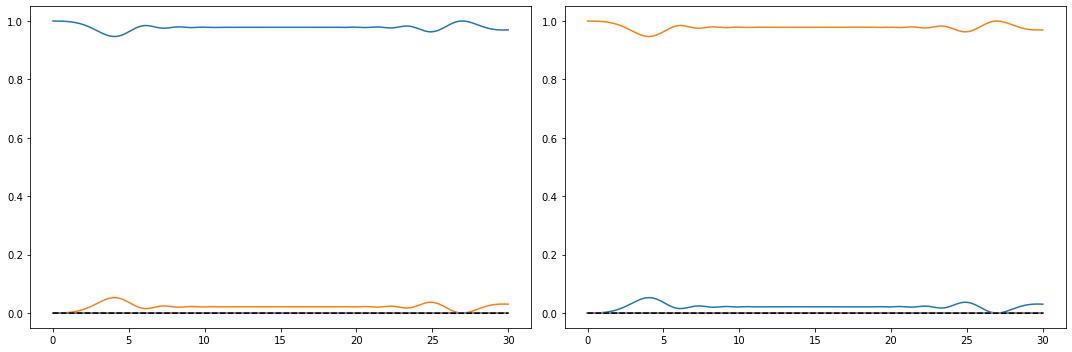

In [509]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj2.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj2.times,occ[:-1,:,0].T)
ax[0].plot(obj2.times,occ[-1,:,0],'k--')

ax[1].plot(obj2.times,occ[:-1,:,1].T)
ax[1].plot(obj2.times,occ[-1,:,1],'k--')
fig.tight_layout()

In [600]:
obj2.stored_losses[0].item()

0.005662381649017334

In [591]:
obj2.stored_losses[0], obj.stored_losses[0,-1]

(tensor([0.0057]), tensor(-2.5749e-05))

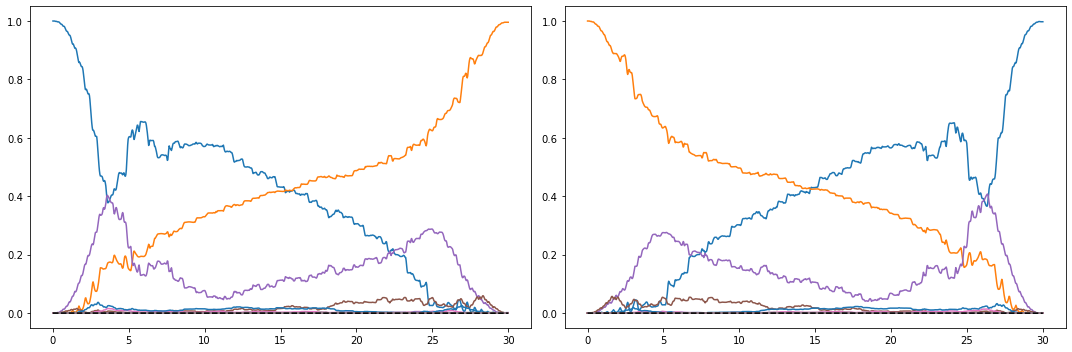

In [597]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj2.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj2.times,occ[:-1,:,0].T)
ax[0].plot(obj2.times,occ[-1,:,0],'k--')

ax[1].plot(obj2.times,occ[:-1,:,1].T)
ax[1].plot(obj2.times,occ[-1,:,1],'k--')
fig.tight_layout()

c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,0].set(title="Initial Pulse",
c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:86: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,2].set(title="Optimized Pulse",


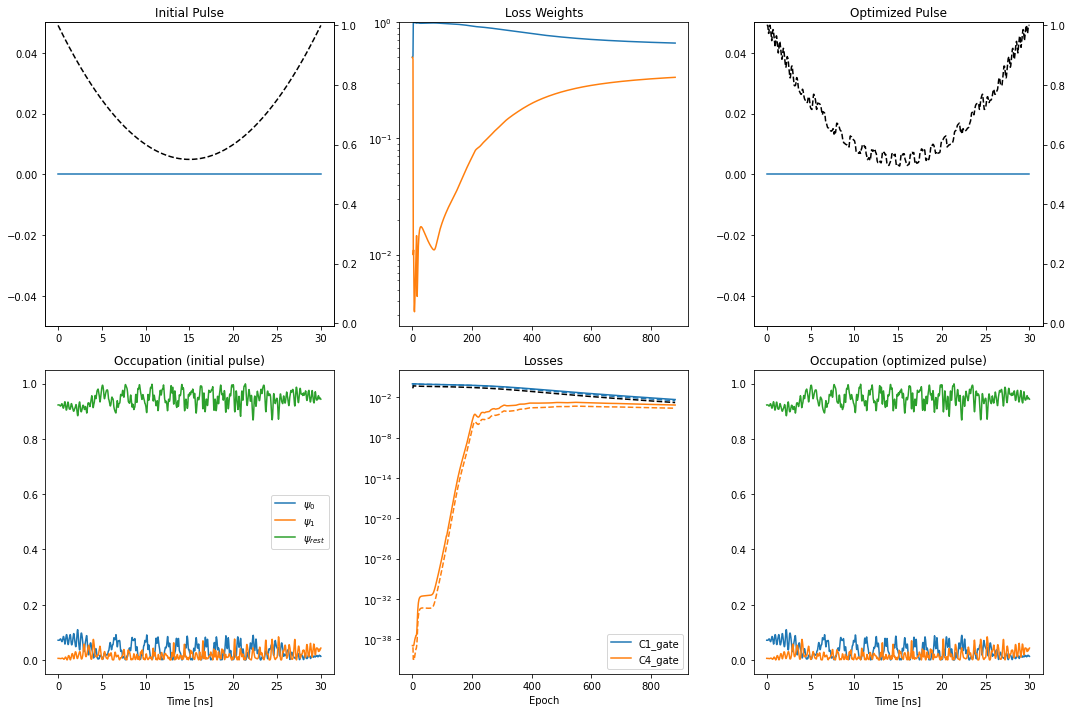

In [552]:
obj.plot_run(save=False,fig_name="tmp.pdf")

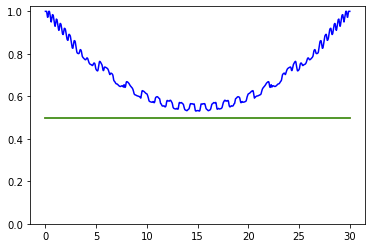

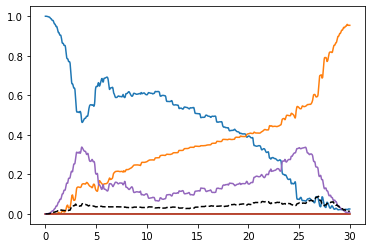

In [424]:
obj2.plot_activation_func()
obj2.plot_occupancy(indices=[_ for _ in range(5)])

In [362]:
obj2.stored_losses, obj.stored_losses[0]

(tensor([[0.9566]]),
 tensor([0.9288, 0.9288, 0.9243, 0.9193, 0.9139, 0.9078, 0.9010, 0.8932, 0.8841,
         0.8735, 0.8609, 0.8456, 0.8267, 0.8267, 0.8033, 0.7744, 0.7394, 0.6991,
         0.6557, 0.6128, 0.5733, 0.5389, 0.5098, 0.4853, 0.4646, 0.4646, 0.4471,
         0.4320, 0.4188, 0.4072, 0.3968, 0.3873, 0.3788, 0.3709, 0.3635, 0.3567,
         0.3503, 0.3503, 0.3442, 0.3384, 0.3330, 0.3277, 0.3227, 0.3179, 0.3132,
         0.3087, 0.3044, 0.3001, 0.2960, 0.2960, 0.2921, 0.2882, 0.2844, 0.2807,
         0.2771, 0.2736, 0.2701, 0.2667, 0.2634, 0.2602, 0.2570, 0.2570, 0.2539,
         0.2508, 0.2478, 0.2449, 0.2420, 0.2391, 0.2363, 0.2335, 0.2308, 0.2281,
         0.2254, 0.2254, 0.2228, 0.2203, 0.2178, 0.2153, 0.2128, 0.2104, 0.2080,
         0.2056, 0.2033, 0.2010, 0.1987, 0.1987, 0.1965, 0.1943, 0.1921, 0.1900,
         0.1878, 0.1857, 0.1837, 0.1816, 0.1796, 0.1776, 0.1756, 0.1756, 0.1737,
         0.1717, 0.1698, 0.1679, 0.1661, 0.1643, 0.1624, 0.1606, 0.1589, 0.1571,
       

In [357]:
obj2.stored_losses, obj.stored_losses[0][-1]

(tensor([[0.0610]]), tensor(0.0566))

In [344]:
obj.activation_func(None)

tensor([1.0000, 0.9912, 0.9912, 0.9914, 0.9932, 0.9937, 0.9922, 0.9886, 0.9800,
        0.9714, 0.9627, 0.9596, 0.9596, 0.9592, 0.9581, 0.9574, 0.9608, 0.9630,
        0.9610, 0.9582, 0.9552, 0.9514, 0.9455, 0.9407, 0.9373, 0.9351, 0.9338,
        0.9334, 0.9325, 0.9309, 0.9289, 0.9271, 0.9256, 0.9245, 0.9235, 0.9221,
        0.9204, 0.9185, 0.9162, 0.9137, 0.9107, 0.9070, 0.9031, 0.9004, 0.8991,
        0.8987, 0.8983, 0.8972, 0.8958, 0.8941, 0.8923, 0.8903, 0.8882, 0.8860,
        0.8834, 0.8809, 0.8788, 0.8774, 0.8762, 0.8750, 0.8736, 0.8721, 0.8705,
        0.8689, 0.8673, 0.8657, 0.8641, 0.8625, 0.8608, 0.8592, 0.8576, 0.8561,
        0.8546, 0.8531, 0.8515, 0.8500, 0.8485, 0.8471, 0.8458, 0.8446, 0.8434,
        0.8422, 0.8410, 0.8397, 0.8383, 0.8369, 0.8355, 0.8340, 0.8326, 0.8312,
        0.8299, 0.8287, 0.8276, 0.8265, 0.8255, 0.8244, 0.8233, 0.8220, 0.8190,
        0.8164, 0.8142, 0.8122, 0.8104, 0.8087, 0.8073, 0.8060, 0.8049, 0.8038,
        0.8026, 0.8013, 0.7999, 0.7985, 

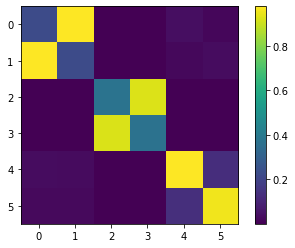

<Figure size 432x288 with 0 Axes>

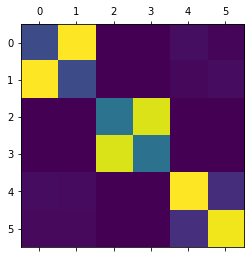

In [343]:
tmp = obj.eigvecs[:,[0,1,2,3,4,5]].adjoint()@obj.basis@obj().detach()@obj.basis.adjoint()@obj.eigvecs[:,[0,1,2,3,4,5]]
plt.imshow(tmp.abs())
plt.colorbar()

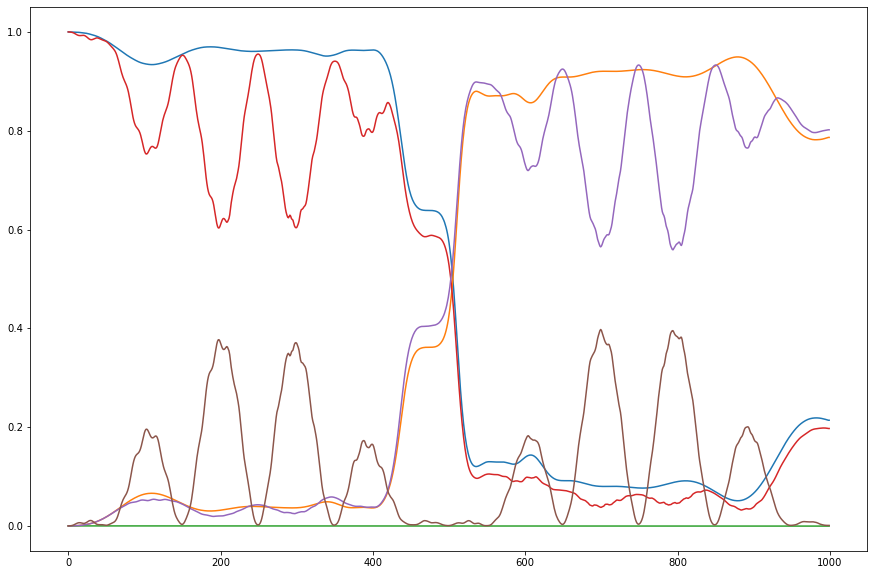

In [200]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(occ[[0,1,18],:,0].T)
ax.plot(tmp_occ[[0,1,2],:,0].T)

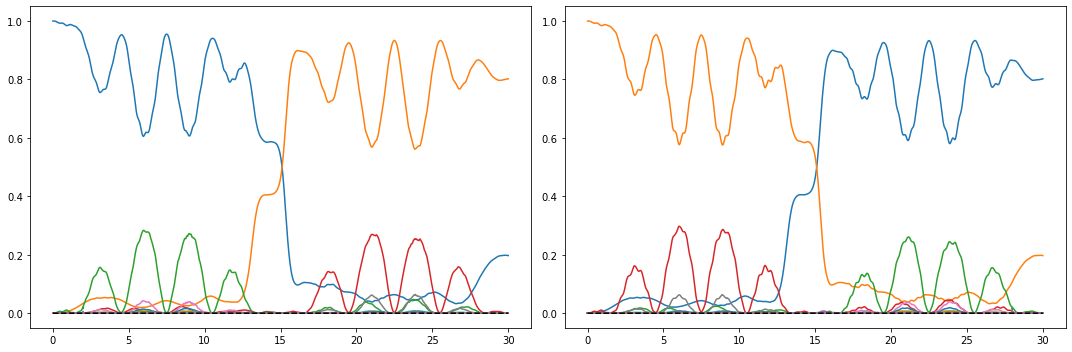

In [208]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj.times,occ[:-1,:,0].T)
ax[0].plot(obj.times,occ[-1,:,0],'k--')

ax[1].plot(obj.times,occ[:-1,:,1].T)
ax[1].plot(obj.times,occ[-1,:,1],'k--')
fig.tight_layout()

In [1650]:
# obj.test = lambda: print("lol")
# obj.get_control = lambda: t.load(os.path.join(obj.params_dict['exp_path'],"21_09_1607_pulse.pt"))
# obj.get_occupancy()
# obj()

In [339]:
obj.minimize(0.01,10)

initial loss: 0.03234249725937843
Ended at step: 188, with loss: 0.028358925133943558 and runtime: 12.772213220596313


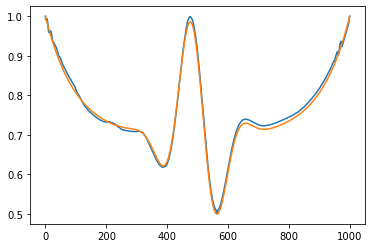

In [341]:
plt.plot(obj.activation_func(obj.times).detach())
plt.plot(obj.init_activation_func(obj.times))

c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,0].set(title="Initial Pulse",
c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:86: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,2].set(title="Optimized Pulse",


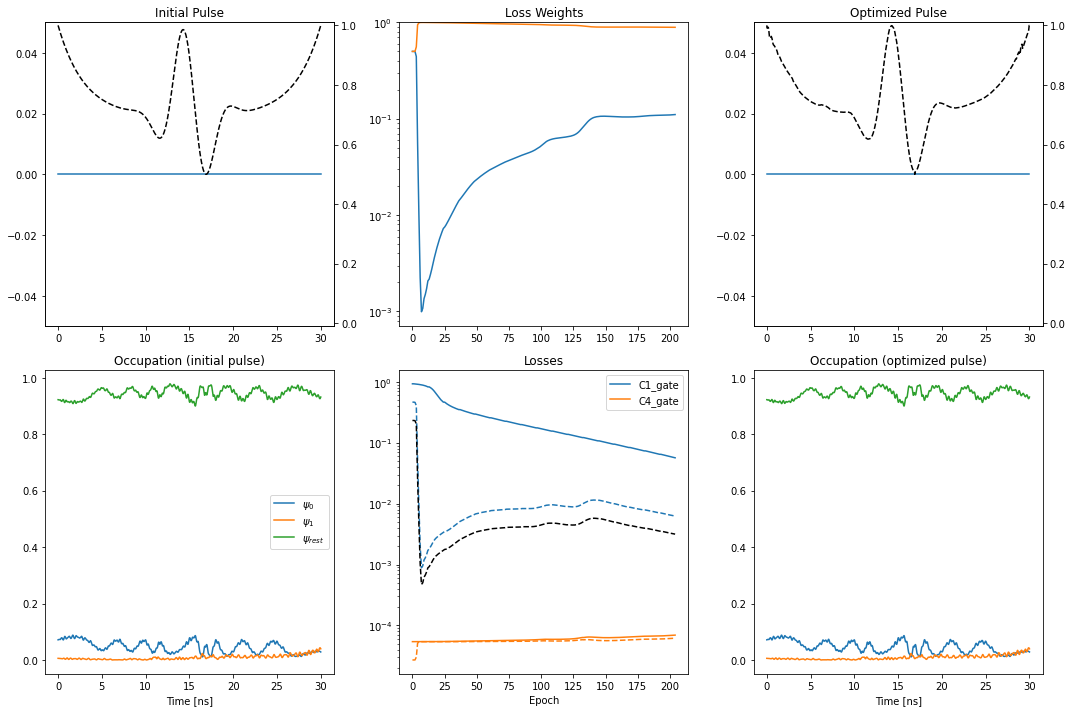

In [340]:
obj.plot_run(save=False,fig_name="ConstrainedPulse_XGate_0toPulse_withC7C8.pdf")

In [334]:
obj.stored_losses[0]

tensor([0.9288, 0.9288, 0.9243, 0.9193, 0.9139, 0.9078, 0.9010, 0.8932, 0.8841,
        0.8735, 0.8609, 0.8456, 0.8267, 0.8267, 0.8033, 0.7744, 0.7394, 0.6991,
        0.6557, 0.6128, 0.5733, 0.5389, 0.5098, 0.4853, 0.4646, 0.4646, 0.4471,
        0.4320, 0.4188, 0.4072, 0.3968, 0.3873, 0.3788, 0.3709, 0.3635, 0.3567,
        0.3503, 0.3503, 0.3442, 0.3384, 0.3330, 0.3277, 0.3227, 0.3179, 0.3132,
        0.3087, 0.3044, 0.3001, 0.2960, 0.2960, 0.2921, 0.2882, 0.2844, 0.2807,
        0.2771, 0.2736, 0.2701, 0.2667, 0.2634, 0.2602, 0.2570, 0.2570, 0.2539,
        0.2508, 0.2478, 0.2449, 0.2420, 0.2391, 0.2363, 0.2335, 0.2308, 0.2281,
        0.2254, 0.2254, 0.2228, 0.2203, 0.2178, 0.2153, 0.2128, 0.2104, 0.2080,
        0.2056, 0.2033, 0.2010, 0.1987, 0.1987, 0.1965, 0.1943, 0.1921, 0.1900,
        0.1878, 0.1857, 0.1837, 0.1816, 0.1796, 0.1776, 0.1756, 0.1756, 0.1737,
        0.1717, 0.1698, 0.1679, 0.1661, 0.1643, 0.1624, 0.1606, 0.1589, 0.1571,
        0.1554, 0.1554, 0.1537, 0.1520, 

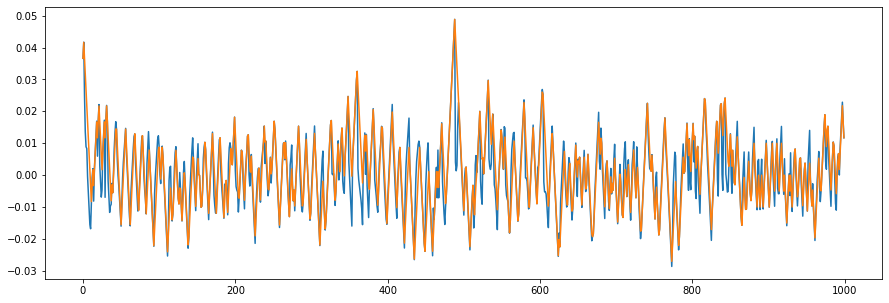

In [153]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(obj.heights.detach())
ax.plot(obj.get_control().detach())
# ax.set_xlim(0,100)

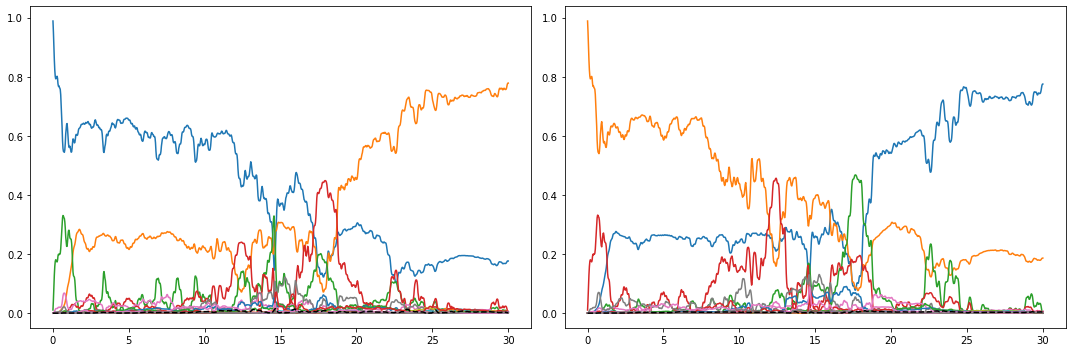

In [154]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj.times,occ[:-1,:,0].T)
ax[0].plot(obj.times,occ[-1,:,0],'k--')

ax[1].plot(obj.times,occ[:-1,:,1].T)
ax[1].plot(obj.times,occ[-1,:,1],'k--')
fig.tight_layout()

In [139]:
U = obj()

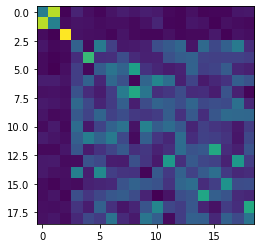

In [140]:
plt.imshow(U.abs().detach())

In [156]:
# t.save(pulse,os.path.join(obj.params_dict['exp_path'],"22_09_1435_pulse.pt"))

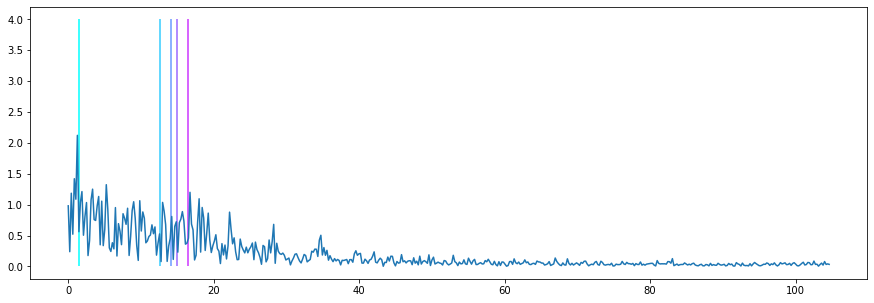

In [155]:
pulse = obj.get_control().detach().clone()
eigvals = obj.H0_term[500].real.diagonal()
energies = [eigvals[3]-eigvals[2],
            eigvals[2]-eigvals[1],
            eigvals[3]-eigvals[1],
            eigvals[2]-eigvals[0],
            eigvals[3]-eigvals[0]]


fft = t.fft.rfft(pulse)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1),fft.abs())
# ax.set_xlim(-1,20)
for i,E in enumerate(energies):
    ax.vlines(E,0,4,colors=(i/len(energies),1-i/len(energies),1))

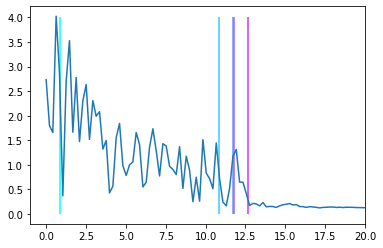

In [530]:
pulse = obj.get_control().detach().clone()
eigvals = obj.H0_term[0].real.diagonal()
energies = [eigvals[3]-eigvals[2],
            eigvals[2]-eigvals[1],
            eigvals[3]-eigvals[1],
            eigvals[2]-eigvals[0],
            eigvals[3]-eigvals[0]]


fft = t.fft.rfft(pulse)
fig, ax = plt.subplots()
ax.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1),fft.abs())
ax.set_xlim(-1,20)
for i,E in enumerate(energies):
    ax.vlines(E,0,4,colors=(i/len(energies),1-i/len(energies),1))